In [1]:
# this notebook preprocesses the data to feed it to a forcasting model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data/COVID19_timeseries.csv")

In [4]:
data.head()

,country,date,infections,Lat,Long,deaths,recovered,Continent,bed_occupancy,ICU_beds,Population,population_world,age_0_to_64,age_15_to_64,age_over_65,month,day
0,Australia,1/24/20,0,-24.502867,141.055589,0,0,Oceania,NaN,NaN,25649909.0,0.0033,0.19,0.655,0.155,1.0,24.0
1,Australia,1/25/20,0,-24.502867,141.055589,0,0,Oceania,NaN,NaN,25649909.0,0.0033,0.19,0.655,0.155,1.0,25.0
2,Australia,1/26/20,4,-24.502867,141.055589,0,0,Oceania,NaN,NaN,25649909.0,0.0033,0.19,0.655,0.155,1.0,26.0
3,Australia,1/27/20,5,-24.502867,141.055589,0,0,Oceania,NaN,NaN,25649909.0,0.0033,0.19,0.655,0.155,1.0,27.0
4,Australia,1/28/20,5,-24.502867,141.055589,0,0,Oceania,NaN,NaN,25649909.0,0.0033,0.19,0.655,0.155,1.0,28.0


In [5]:
data.shape

(1887, 17)

In [6]:
# add country as index
data = data.set_index('country')

In [7]:
# dummy encode the 'Continent' column
data = pd.concat([data, pd.get_dummies(data['Continent'])], axis=1).drop('Continent', axis=1)

In [8]:
# drop the date and population column 
data = data.drop(['date', 'Population'], axis=1)

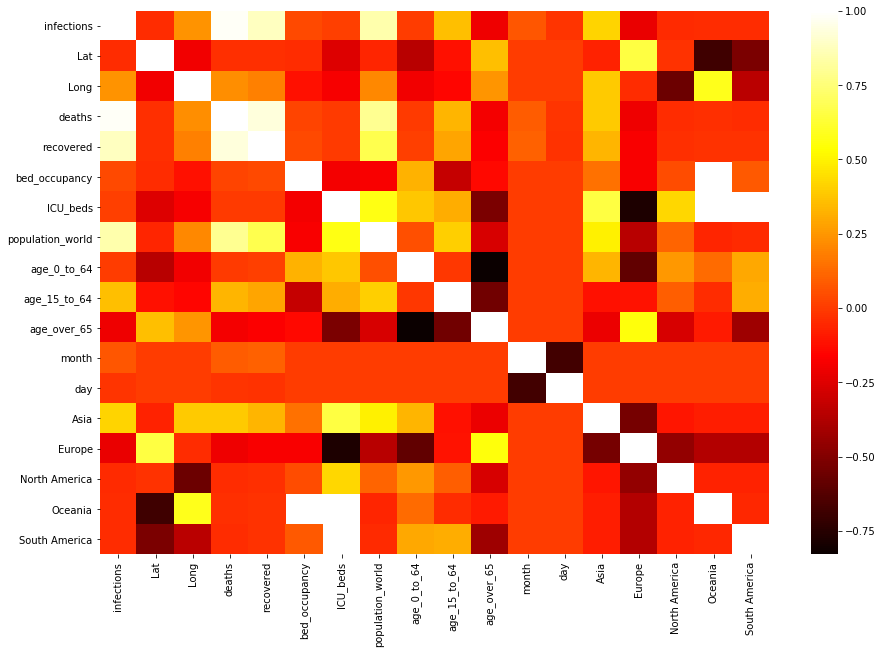

In [9]:
# visualize correlations between columns
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 10)
sns.heatmap(data.corr(), cmap='hot', ax=ax)

In [10]:
# bed_occupancy and ICU_beds contain NaNs values
# KNN impute both columns

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

In [11]:
imputer.fit(data)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=3, weights='uniform')

In [12]:
data = pd.DataFrame(imputer.transform(data), columns=data.columns, index=data.index)

In [13]:
# set country as index
data.head()

,infections,Lat,Long,deaths,recovered,bed_occupancy,ICU_beds,population_world,age_0_to_64,age_15_to_64,age_over_65,month,day,Asia,Europe,North America,Oceania,South America
country,,,,,,,,,,,,,,,,,,
Australia,0.0,-24.502867,141.055589,0.0,0.0,0.755,46.0,0.0033,0.19,0.655,0.155,1.0,24.0,0.0,0.0,0.0,1.0,0.0
Australia,0.0,-24.502867,141.055589,0.0,0.0,0.755,46.0,0.0033,0.19,0.655,0.155,1.0,25.0,0.0,0.0,0.0,1.0,0.0
Australia,4.0,-24.502867,141.055589,0.0,0.0,0.755,46.0,0.0033,0.19,0.655,0.155,1.0,26.0,0.0,0.0,0.0,1.0,0.0
Australia,5.0,-24.502867,141.055589,0.0,0.0,0.755,46.0,0.0033,0.19,0.655,0.155,1.0,27.0,0.0,0.0,0.0,1.0,0.0
Australia,5.0,-24.502867,141.055589,0.0,0.0,0.755,46.0,0.0033,0.19,0.655,0.155,1.0,28.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# use Netherlands as test data series and Belgium as validation series
data_nl = data[data.index == "Netherlands"]
data_bel = data[data.index == "Belgium"]

In [15]:
# drop test and validation data from train data
data = data.drop(['Netherlands', 'Belgium'])

In [16]:
data_nl.head()

,infections,Lat,Long,deaths,recovered,bed_occupancy,ICU_beds,population_world,age_0_to_64,age_15_to_64,age_over_65,month,day,Asia,Europe,North America,Oceania,South America
country,,,,,,,,,,,,,,,,,,
Netherlands,0.0,52.1326,5.2913,0.0,0.0,0.654,6.4,0.00224,0.164,0.648,0.188,1.0,24.0,0.0,1.0,0.0,0.0,0.0
Netherlands,0.0,52.1326,5.2913,0.0,0.0,0.654,6.4,0.00224,0.164,0.648,0.188,1.0,25.0,0.0,1.0,0.0,0.0,0.0
Netherlands,0.0,52.1326,5.2913,0.0,0.0,0.654,6.4,0.00224,0.164,0.648,0.188,1.0,26.0,0.0,1.0,0.0,0.0,0.0
Netherlands,0.0,52.1326,5.2913,0.0,0.0,0.654,6.4,0.00224,0.164,0.648,0.188,1.0,27.0,0.0,1.0,0.0,0.0,0.0
Netherlands,0.0,52.1326,5.2913,0.0,0.0,0.654,6.4,0.00224,0.164,0.648,0.188,1.0,28.0,0.0,1.0,0.0,0.0,0.0


In [17]:
n_countries = 35
n_timesteps = 51
n_features = len(data.columns)

In [18]:
# reshape data to appropriate 3D timeseries data
x_train = np.reshape(data.values, (n_countries, n_timesteps, n_features))

In [19]:
x_val = np.reshape(data_bel.values, (1, n_timesteps, n_features))
x_test = np.reshape(data_nl.values, (1, n_timesteps, n_features))

In [20]:
# create the labels by shifting the 'infections' column to the left
y_train = x_train[:, :, 0].copy()
y_val = x_val[:, :, 0].copy()
y_test = x_test[:, :, 0].copy()

In [21]:
# to shift to left, remove first element
y_train = y_train[:, 1:]
y_val = y_val[:, 1:]
y_test = y_test[:, 1:]

In [22]:
# shift data to right by removing final timestep
x_train = x_train[:, :-1]
x_val = x_val[:, :-1]
x_test = x_test[:, :-1]

In [23]:
x_train.shape, x_val.shape, x_test.shape

((35, 50, 18), (1, 50, 18), (1, 50, 18))

In [24]:
y_train.shape, y_val.shape, y_test.shape

((35, 50), (1, 50), (1, 50))